In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [138]:
df = pd.read_csv(
    "../../data/market/sp500_from_1980.csv", 
)
df["Date"] = pd.to_datetime(df["Date"], utc=True).dt.date
df = df.astype({"Date": "datetime64"})
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-01-02,0.0,108.430000,105.290001,105.760002,40610000,0,0
1980-01-03,0.0,106.080002,103.260002,105.220001,50480000,0,0
1980-01-04,0.0,107.080002,105.089996,106.519997,39130000,0,0
1980-01-07,0.0,107.800003,105.800003,106.809998,44500000,0,0
1980-01-08,0.0,109.290001,106.290001,108.949997,53390000,0,0


In [165]:
df["high_low"] = (df["High"] - df["Low"])
df["high_close"] = np.abs(df["High"] - df["Close"].shift(1)) 
df["low_close"] = np.abs(df["Low"] - df["Close"].shift(1)) 

df["range"] = np.max(df[["high_low", "high_close", "low_close"]], axis=1)

df["atr"] = df["range"].rolling(14).mean()
df["trend"] = df["Close"].rolling(14).mean()

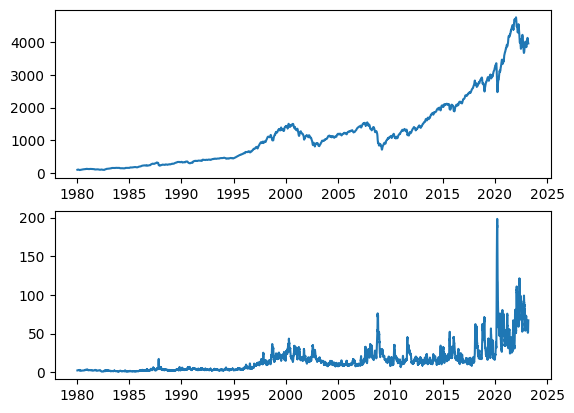

In [166]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(df["trend"])
ax2.plot(df["atr"])
plt.show()